In [1]:
import pandas as pd

df = pd.read_csv("Dataset.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [4]:
df['name'] = df.species

df.species = encoder.fit_transform(df.species)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,name
0,5.1,3.5,1.4,0.2,0,Iris-setosa
1,4.9,3.0,1.4,0.2,0,Iris-setosa
2,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5.0,3.6,1.4,0.2,0,Iris-setosa


In [5]:
df.name.value_counts()

name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [7]:
df1 = df.copy()
var1 = km.fit_predict(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
df1['cluster'] = var1

In [8]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species,name,cluster
0,5.1,3.5,1.4,0.2,0,Iris-setosa,1
1,4.9,3.0,1.4,0.2,0,Iris-setosa,1
2,4.7,3.2,1.3,0.2,0,Iris-setosa,1
3,4.6,3.1,1.5,0.2,0,Iris-setosa,1
4,5.0,3.6,1.4,0.2,0,Iris-setosa,1


In [9]:
df2 = df1[df1.cluster == 0]
df3 = df1[df1.cluster == 1]
df4 = df1[df1.cluster == 2]

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

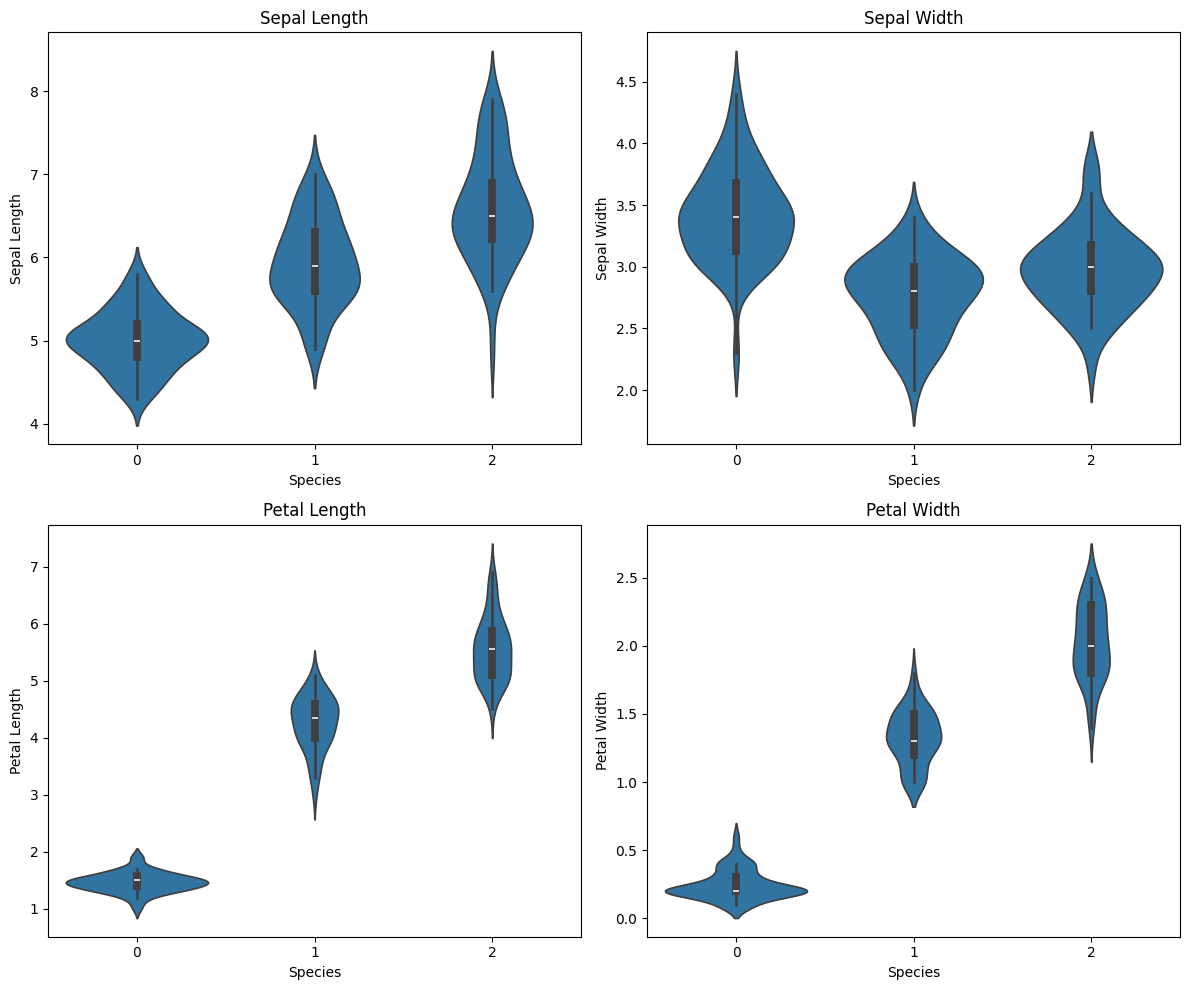

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
titles = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

for ax, feature, title in zip(axes, features, titles):
    sns.violinplot(x='species', y=feature, data=df, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Species')
    ax.set_ylabel(title)

plt.tight_layout()
plt.show()

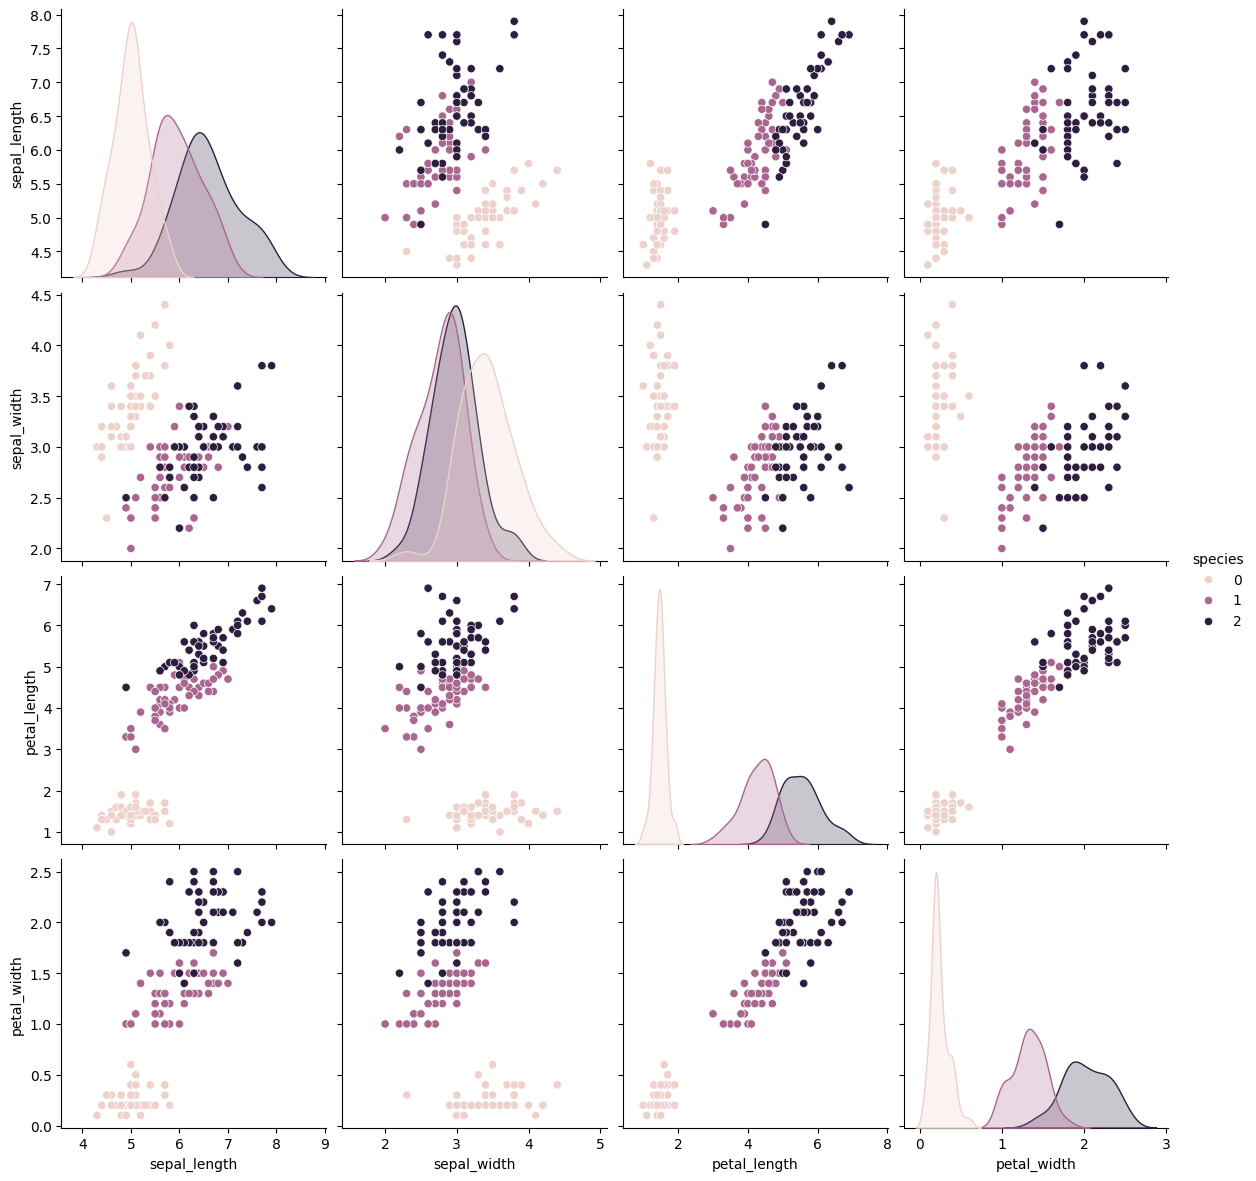

In [12]:
sns.pairplot(df, hue='species', height=3)
plt.show()

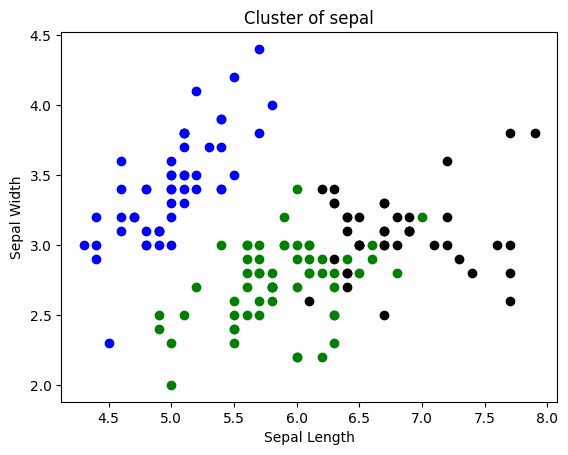

In [13]:
plt.scatter(df2.sepal_length, df2.sepal_width, color= 'green')
plt.scatter(df3.sepal_length, df3.sepal_width, color='blue')
plt.scatter(df4.sepal_length, df4.sepal_width, color='black')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Cluster of sepal')
plt.show()

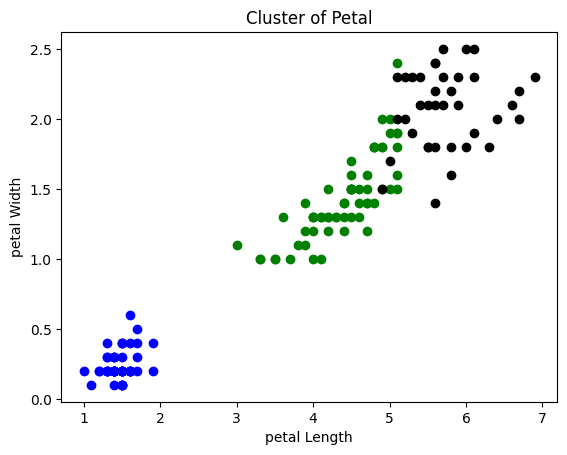

In [14]:
plt.scatter(df2.petal_length, df2.petal_width, color= 'green')
plt.scatter(df3.petal_length, df3.petal_width, color='blue')
plt.scatter(df4.petal_length, df4.petal_width, color='black')
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title('Cluster of Petal')
plt.show()

Proceeding to MIn-Max Scaler & repeating KMeans Clustering

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
df1[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(df1[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species,name,cluster
0,0.222222,0.625000,0.067797,0.041667,0,Iris-setosa,1
1,0.166667,0.416667,0.067797,0.041667,0,Iris-setosa,1
2,0.111111,0.500000,0.050847,0.041667,0,Iris-setosa,1
3,0.083333,0.458333,0.084746,0.041667,0,Iris-setosa,1
4,0.194444,0.666667,0.067797,0.041667,0,Iris-setosa,1


In [17]:
km = KMeans(n_clusters=3)

df1 = df.copy()
var1 = km.fit_predict(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
df1['cluster'] = var1

In [18]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species,name,cluster
0,5.1,3.5,1.4,0.2,0,Iris-setosa,1
1,4.9,3.0,1.4,0.2,0,Iris-setosa,1
2,4.7,3.2,1.3,0.2,0,Iris-setosa,1
3,4.6,3.1,1.5,0.2,0,Iris-setosa,1
4,5.0,3.6,1.4,0.2,0,Iris-setosa,1


In [19]:
df3 = df1[df1.cluster == 0]
df4 = df1[df1.cluster == 1]
df5 = df1[df1.cluster == 2]

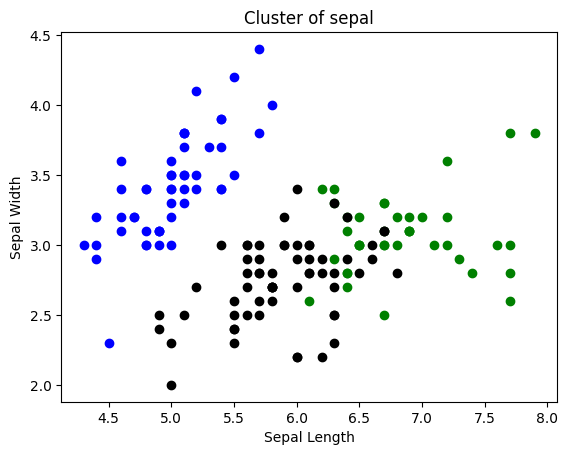

In [20]:
plt.scatter(df3.sepal_length, df3.sepal_width, color= 'green')
plt.scatter(df4.sepal_length, df4.sepal_width, color='blue')
plt.scatter(df5.sepal_length, df5.sepal_width, color='black')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Cluster of sepal')
plt.show()

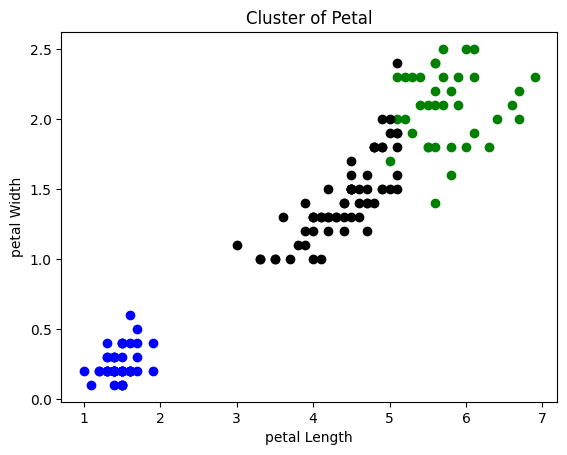

In [21]:
plt.scatter(df3.petal_length, df3.petal_width, color= 'green')
plt.scatter(df4.petal_length, df4.petal_width, color='blue')
plt.scatter(df5.petal_length, df5.petal_width, color='black')
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title('Cluster of Petal')
plt.show()

Creating a Classification Model

In [22]:
x = df1[['sepal_length', 'sepal_width','petal_length', 'petal_width']]
y = df1.species

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 3)

In [25]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [27]:
model.score(X_test, y_test)

1.0

In [28]:
df1.species[148]

2

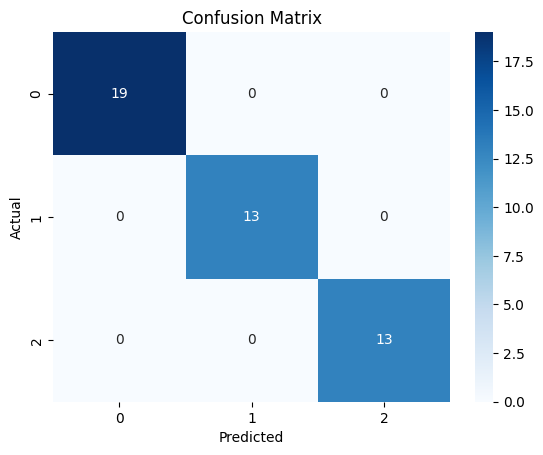

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()